# Question 2:
In this part of the assignment you will practice putting together a simple machine learning pipeline and to implement the K-nearest neighbor algorithm. You will familiairze yourselves with different python libraries (scikit-learn, matplotlib, pandas) that are helpful tools for machine learning.

## 1. Preparing the data

In this assignment we will use the Iris Flower Species Dataset. This dataset consists of 3 different types of irise species (Setosa, Versicolour, and Virginica) where we have the following measures for each flower sample: the petal length, the sepal length, the petal width, the sepal width.

Below is an example.




![Drag Racing](https://www.integratedots.com/wp-content/uploads/2019/06/iris_petal-sepal-e1560211020463.png)

This data is stored in a 150x4 numpy array, where 150 is the number of sample flowers and 4 is the measured features for each.  Go through the following steps to download the data.

In [255]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()

# We use pandas dataframe to see the table
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [256]:
# Setosa, Versicolour, and Virginica
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We use pandas dataframe to see the statistics of this data.

In [257]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In this assignment we only use the first two features (sepal length and width) for easier visualization. We also split the dataset into 2 cohorts for training and testing.

In [258]:
from sklearn.model_selection import train_test_split

X = iris.data[:, :2] # The data matrix 
y = iris.target # The class labels

# We take 20% as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((120, 2), (30, 2))

Now let's visualize this data to get some sense of the samples. 

No handles with labels found to put in legend.


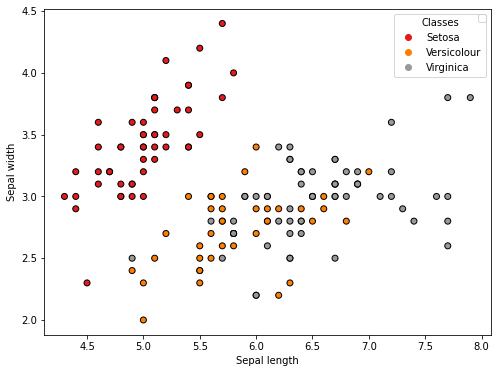

In [259]:
import matplotlib.pyplot as plt

f, axs = plt.subplots(figsize=(8,6))
the_scatter = axs.scatter(X[:, 0], X[:, 1], c=y,
            cmap=plt.cm.Set1, edgecolor='k')

# Change the legend name of the class to be Iris species like Setosa, Versicolour etc...
lines, legend_names = the_scatter.legend_elements()
legend1 = axs.legend(lines, ['Setosa', 'Versicolour', 'Virginica'], title="Classes")
axs.add_artist(legend1)

axs.set_xlabel('Sepal length')
axs.set_ylabel('Sepal width')
axs.legend()

plt.show()

## 2. Implemeting K-Nearest Neighbors
Now we want to implement the K-nearest neighbor algorithm. 

Fill in the code block below for calculating the distance between two vectors. **One line changed below**

In [260]:
from math import sqrt
import numpy as np

# calculate the Euclidean distance between two vectors
def euclidean_distance(x1, x2):
    
    ## Anja's work:
    distance = sqrt(np.sum((x2-x1)**2))
    
    return distance

# This is a helper function to print information on each sample
def print_features(x,y):
    print('Iris type:', ['Setosa', 'Versicolour', 'Virginica'][y-1])
    print('Sepal Length: %.1f \t Sepal Width: %.1f'%(x[0], x[1]))   

Then we calculate the euclidean distance to a test example

In [261]:
# We randomly pick a test example
sample = X_test[10]
print('Test Sample:')
print_features(sample, y_test[10])

# Calculate the euclidean distance to this test example
distances = []
for i, row in enumerate(X_train):
    distance = euclidean_distance(sample, row)
#     print(f"{i}: {distance} from x1: {sample} and x2: {row}") # Checking calculations above for correctedness
    distances.append((i, distance))
distances.sort(key=lambda tup: tup[1])

k = 2 # Number of nearest neighbors
print('\nTop %d Nearest Neighbors:' % k)
for nn in range(k):
    print_features(X_train[distances[nn][0]], y_train[distances[nn][0]])

Test Sample:
Iris type: Versicolour
Sepal Length: 6.5 	 Sepal Width: 3.2

Top 2 Nearest Neighbors:
Iris type: Setosa
Sepal Length: 6.4 	 Sepal Width: 3.2
Iris type: Versicolour
Sepal Length: 6.4 	 Sepal Width: 3.2


We can calculate the distance for all the pairs of test examples. For example, if there are **Ntr** training examples and **Nte** test examples, this stage should result in a **Nte x Ntr** matrix where each element (i,j) is the distance between the i-th test and j-th train example.

<function matplotlib.pyplot.show(close=None, block=None)>

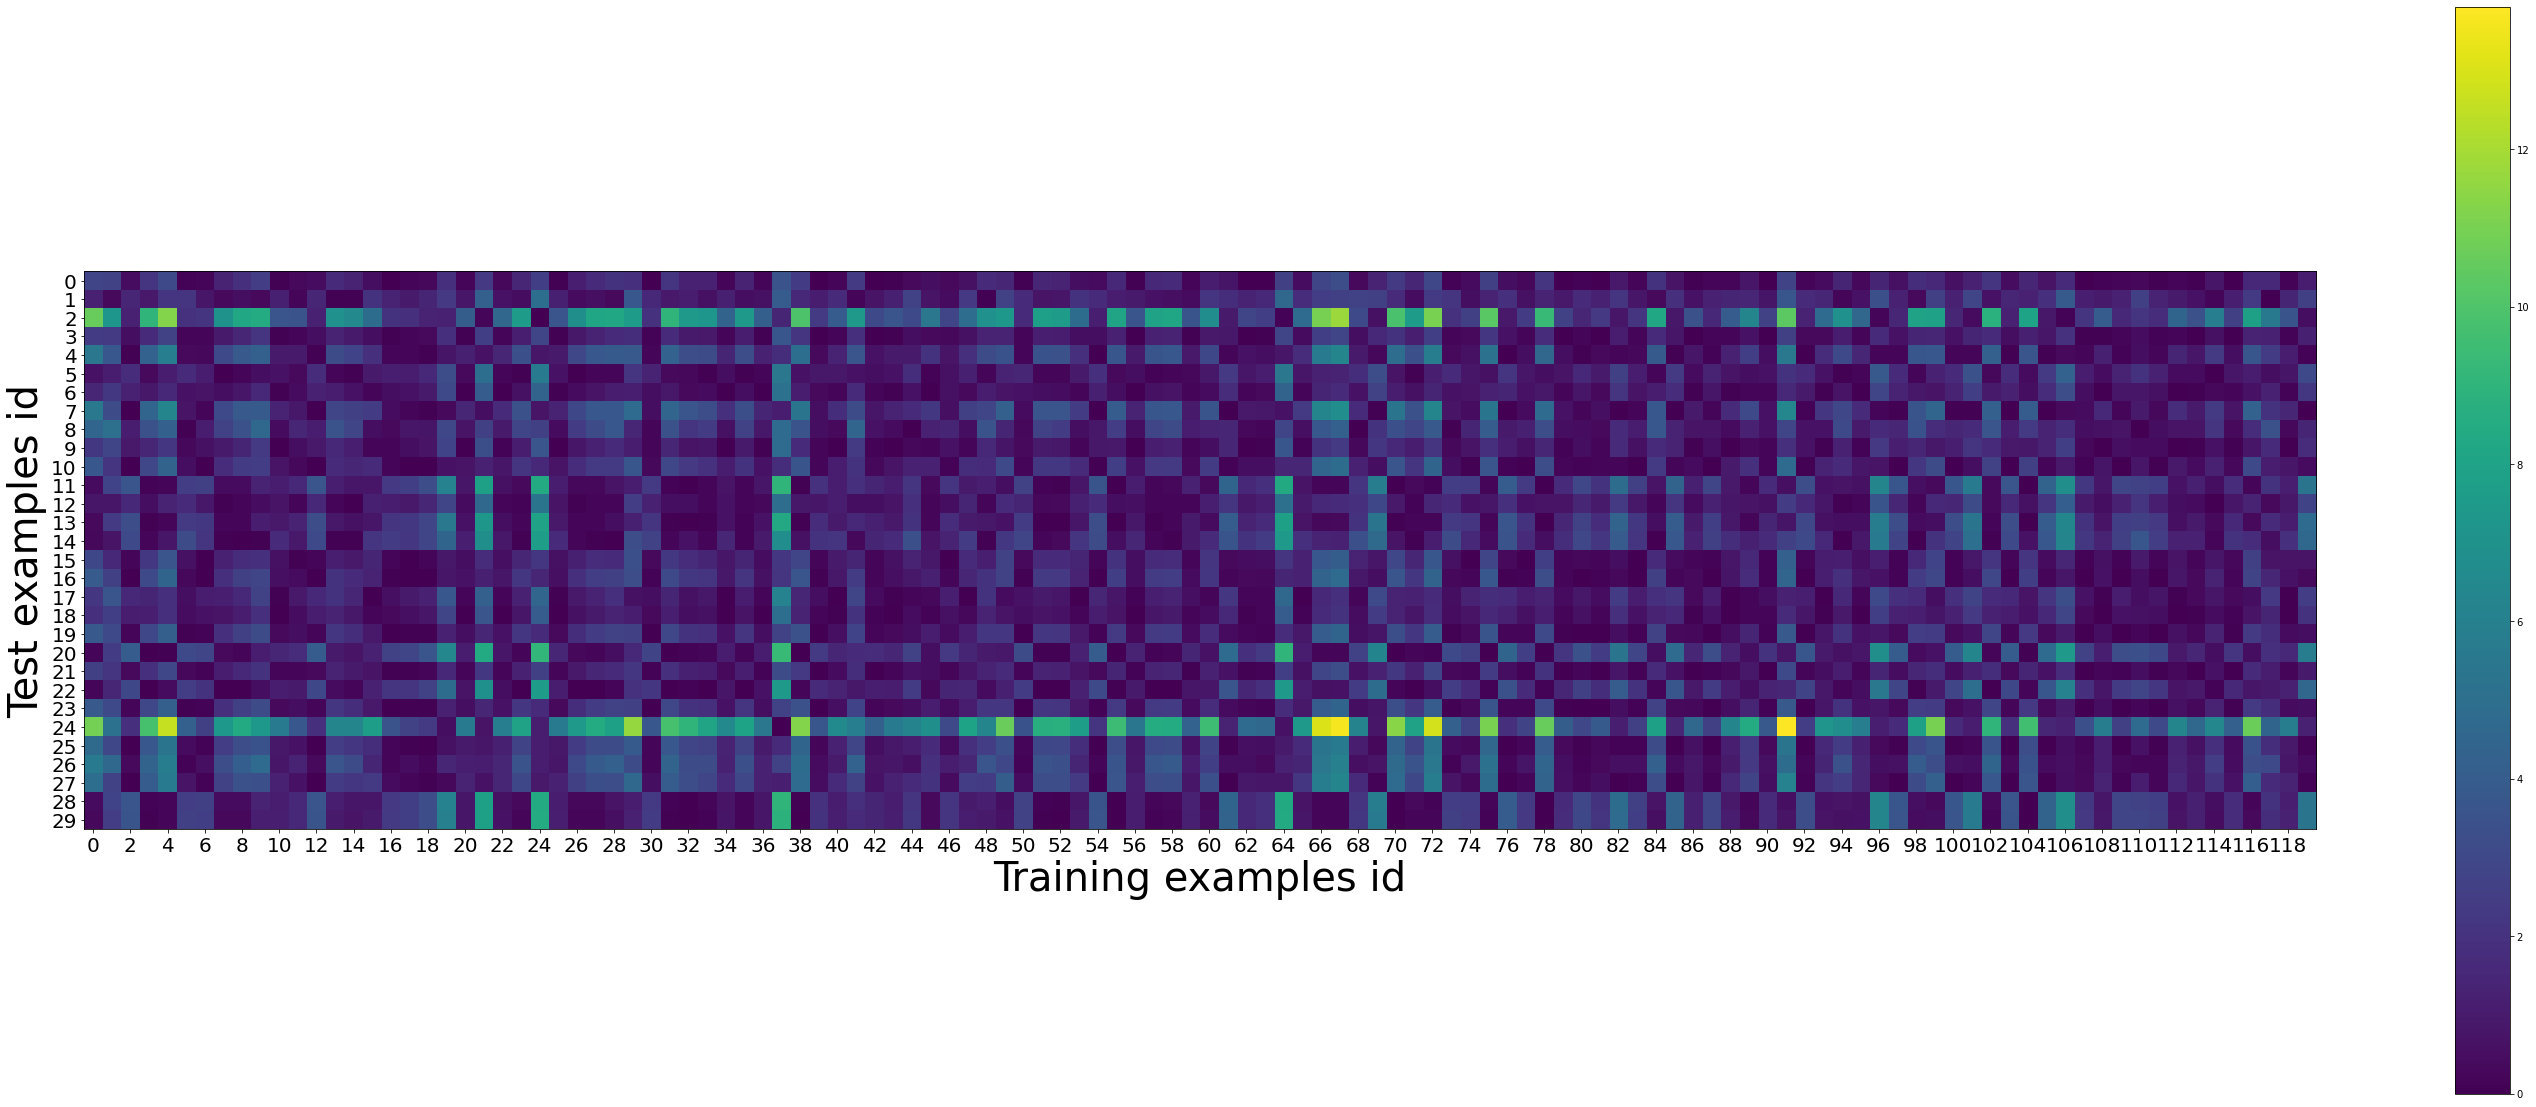

In [262]:
import numpy as np

distances = []
for x_test in X_test:
    distance = np.sum((x_test[np.newaxis, ...] - X_train) ** 2, axis=1)
    distances.append(distance)

distances = np.array(distances)
plt.figure(figsize=(50, 20))
plt.imshow(distances)
plt.colorbar()
plt.xlabel('Training examples id', fontsize=40)
plt.ylabel('Test examples id', fontsize=40)
plt.xticks(np.arange(0, 120, 2), fontsize=20)
plt.yticks(np.arange(0, 30, 1), fontsize=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

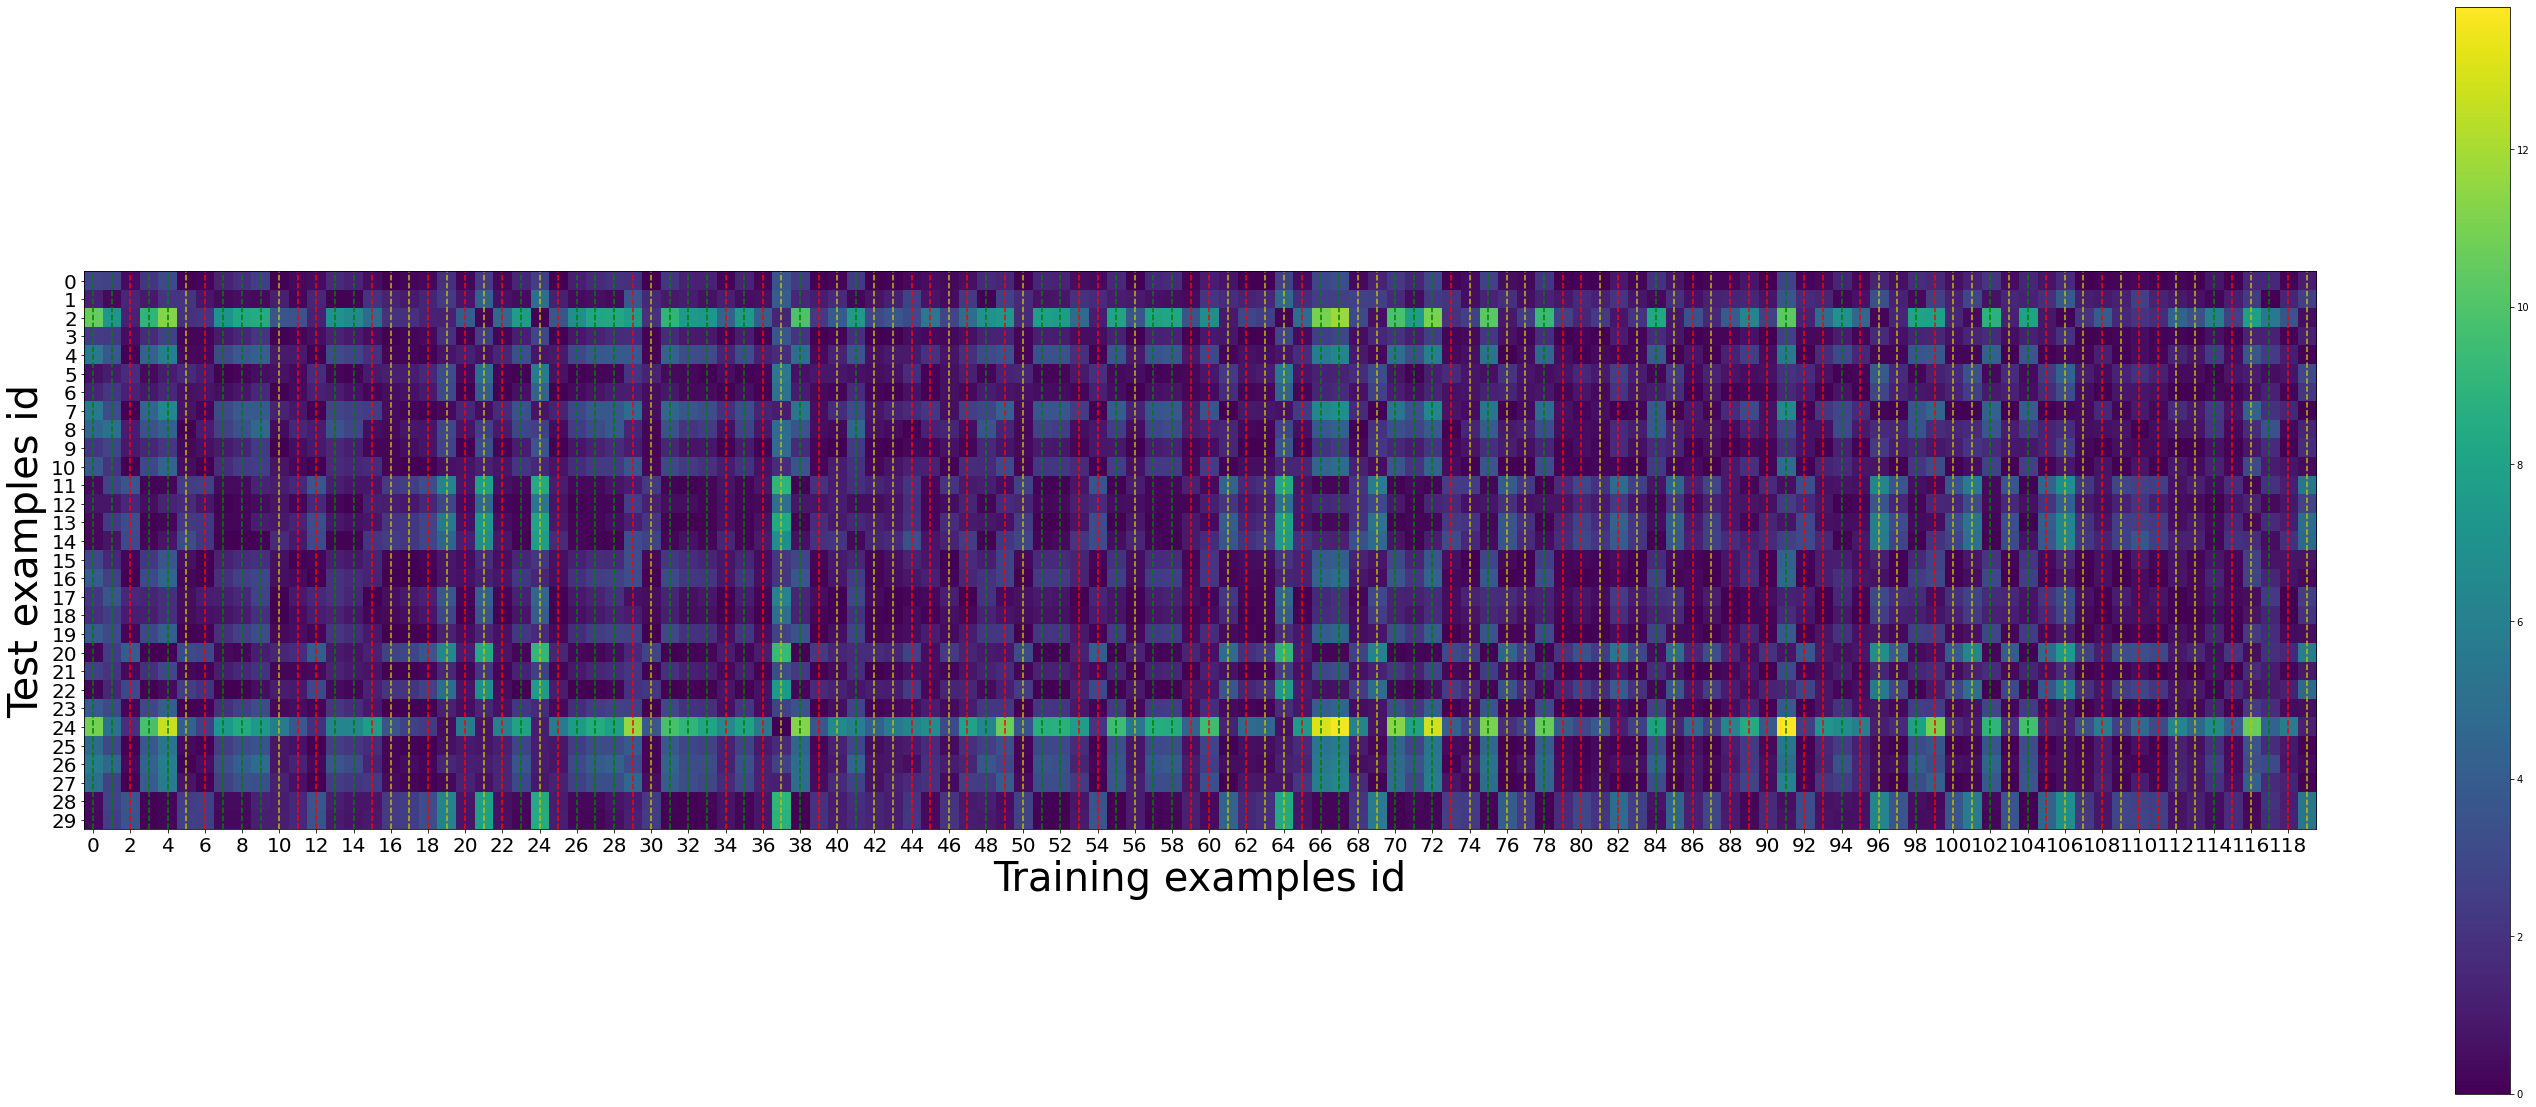

In [272]:
# Analyzing which training IDs belong to which class to further understand the distances and best training IDs
import numpy as np

# Creating lists of indicies corresponding to each of the three varieties of flower:
index_list0 = []
for i, value in enumerate(y_train):
    if y_train[i] == 0:
        index_list0.append(i)

index_list1 = []
for i, value in enumerate(y_train):
    if y_train[i] == 1:
        index_list1.append(i)

index_list2 = []
for i, value in enumerate(y_train):
    if y_train[i] == 2:
        index_list2.append(i)

distances = []
for x_test in X_test:
    distance = np.sum((x_test[np.newaxis, ...] - X_train) ** 2, axis=1)
    distances.append(distance)

distances = np.array(distances)
plt.figure(figsize=(50, 20))
plt.imshow(distances)
plt.colorbar()
plt.xlabel('Training examples id', fontsize=40)
plt.ylabel('Test examples id', fontsize=40)
plt.xticks(np.arange(0, 120, 2), fontsize=20)
plt.yticks(np.arange(0, 30, 1), fontsize=20)
# Drawing lines with the corresponding flowers
# Green represents 'Setosa'
for xc0 in index_list0:
    plt.axvline(x=xc0, color='g', linestyle='--')
# Red represents 'Versicolour'
for xc1 in index_list1:
    plt.axvline(x=xc1, color='r', linestyle='--')
# Yellow represents 'Virginica'
for xc2 in index_list2:
    plt.axvline(x=xc2, color='y', linestyle='--')
plt.show

### Question 1

Notice the structured patterns in the distance matrix, where some rows or columns are visible brighter.

1.  Which training examples are probably more important for test predictions in a K nearest neighbor classifier? Why? 
2.  Which test examples are closer to most of the training examples?

$\color{blue}{\textit Anja's  Answer:}$  

1. *There are two different approaches that I believe can be taken: a) picking several of examples which have the most variety within themselves but are different from each other or b) picking several of examples with the least amount of variety within themselves but once again are different from each other. I think it is dependent on what you want to do with the training data and I think it also depends on the spread of your data.*   
  
*In our example, we can see that ‘Setosa’ has clear boundaries, while 'Versicolour’ and 'Virginica' have less clear boundaries. Therefore, I believe that the training set should have a mixture of my a) and b) approaches:*  
   
a) *For example, ID 4 and 37 both have a lot of variation, but different variation from each other – which I think is an important fact to consider. If I were to only include similar variations, for instance, 19, 21, 24, 37, and 64, we can see that they would not give too much added information to our training set.*   
    
b) *For the training examples that have less variation, I would recommend taking IDs such as 10 and 11, as they represent different classifications and have a slight difference in variation from each other but are similar in terms of distances from surrounding points. These examples would allow us to identify more of a difference between the more closely related specimens.*      
   
   
2. *The test examples with the darkest row(s) are the ones that are closer to the training examples as the distance is the closest to zero (e.g. 5).*



Now we will use the scikit learn library to implement a simple KNN. 

In [264]:
from sklearn.neighbors import KNeighborsClassifier

k = 2 # Number of nearest neighbors
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

Let's pick a sample from our test set. Now we want to find the 5 closest neighbors of this sample from the training set. Complete the code segment below to find these samples and print out their features (hint: use kneighbors method for KNeighborsClassifier https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
   
**Added 3 lines and modified the last one.**


In [265]:
from sklearn.neighbors import KNeighborsClassifier

sample = X_test[10]
print('A random sample chosen from the testset:')
print_features(sample, y_test[10])

## Anja's work:
k=5
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
dists, neighbor_ids = neigh.kneighbors(X=[sample], n_neighbors = 5)

print('\nClosest 5 neighbors to this test sample:')
for knn in range(5):
    print('\nNeighbor %d ===> distance:%f'%(knn, dists[0][knn]))
    print_features(X_train[neighbor_ids[0][knn]], y_train[neighbor_ids[0][knn]])
    

A random sample chosen from the testset:
Iris type: Versicolour
Sepal Length: 6.5 	 Sepal Width: 3.2

Closest 5 neighbors to this test sample:

Neighbor 0 ===> distance:0.100000
Iris type: Versicolour
Sepal Length: 6.4 	 Sepal Width: 3.2

Neighbor 1 ===> distance:0.100000
Iris type: Setosa
Sepal Length: 6.4 	 Sepal Width: 3.2

Neighbor 2 ===> distance:0.141421
Iris type: Versicolour
Sepal Length: 6.4 	 Sepal Width: 3.1

Neighbor 3 ===> distance:0.200000
Iris type: Versicolour
Sepal Length: 6.5 	 Sepal Width: 3.0

Neighbor 4 ===> distance:0.200000
Iris type: Versicolour
Sepal Length: 6.5 	 Sepal Width: 3.0


We can visualize the decision boundary

In [266]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

/var/folders/2f/v588s3cn6bqfcb4gvqd8hc7r0000gn/T/ipykernel_94538/793818358.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


Text(0, 0.5, 'Sepal width')

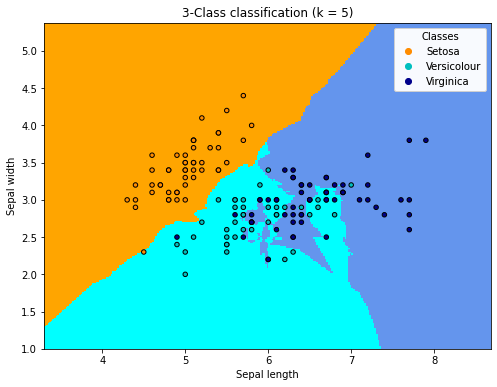

In [267]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
the_scatter = ax.scatter(
    X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)

# Change the legend name of the class to be Iris species like Setosa, Versicolour etc...
lines, legend_names = the_scatter.legend_elements()
legend1 = ax.legend(lines, ['Setosa', 'Versicolour', 'Virginica'], 
                     title="Classes")
ax.add_artist(legend1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (k))
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Let's use the KNN to predict on the whole test set and calculate accuracy

In [268]:
y_pred = neigh.predict(X_test)
accuracy = (y_pred == y_test).mean()
print('test accuracy: %f' % accuracy)

test accuracy: 0.800000


We can calculate the test accuracy with respect to different choices of K for K-nearest neighbors.

In [269]:
# Helper function for calculating accuracy
def accuracy(y_pred, y_test):
    accuracy = (y_pred == y_test).mean()
    return accuracy

In [270]:
test_accs = []
for k in range(1, X_train.shape[0]):
    # Create K nearest neighbors classifier
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    
    # Prediction
    y_pred = neigh.predict(X_test)
    
    # Calculate accuracy
    acc = (y_pred == y_test).mean()
    test_accs.append(acc)

<function matplotlib.pyplot.show(close=None, block=None)>

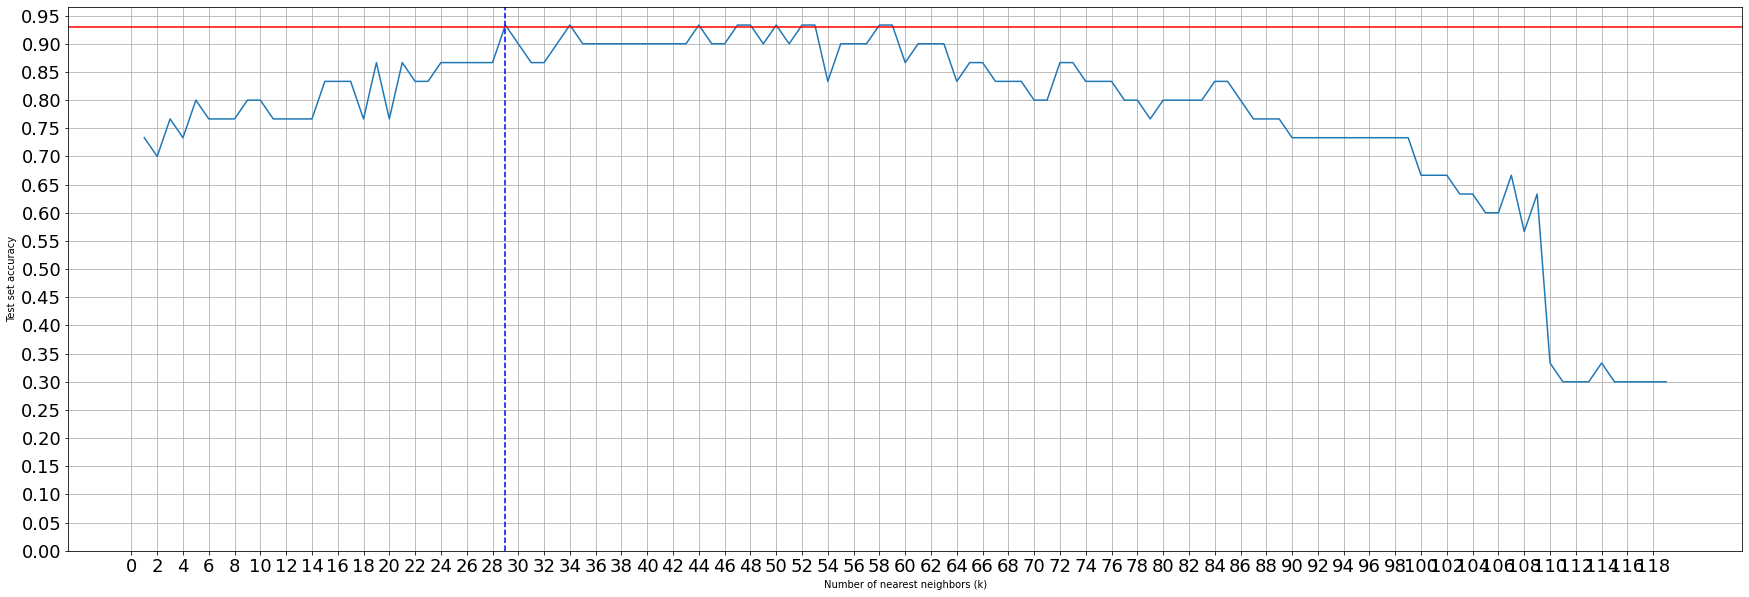

In [271]:
plt.figure(figsize=(30, 10))
plt.plot(list(range(1, X_train.shape[0])), test_accs)
plt.axhline(y=0.93, color='r', linestyle='-')
plt.axvline(x=29, color='b', linestyle='--')
plt.xlabel('Number of nearest neighbors (k)')
plt.ylabel('Test set accuracy')
plt.xticks(np.arange(0, 120, 2), fontsize=18)
plt.yticks(np.arange(0, 1.0, 0.05), fontsize=18)
plt.grid()
plt.show

### Question 2

See from the graph and answer the following questions:

1. Which k gives the best test set accuracy? 
2. When k becomes larger and close to size of the training set, the test set accuracy drops. Why is that? 

$\color{blue}{\textit Anja's Answer:}$    
1. *The best k-values to choose would be the ones that have the highest test accuracy, meaning that they get the correct identifications the most often. In this case, the highest accuracy is approximately 0.93 (denoted with a red line on the graph).  Although there are several k-values that can be used for the best test-set accuracy, I would personally choose k=29. This is because it is the smallest k-value that has the highest test-set accuracy, meaning it would make the computation faster while keeping accuracy high.*  
  
  
2. *As k becomes larger it means that it is less impacted by clusters of surrounding points, which leads to underfitting. This would lead to a lower ability to recognize small differences within a training set of data when creating boundaries, leading to misclassifications.*


### Question 3

1. Train a KNN classifier for the iris data, but this time use all 4 features instead of only 2. Report on the performance of the model and explain why it is better or worse. What differences do you observe? 

$\color{blue}{\textit Your Answer:}$ **Put work and answer in new ipynb, so not to change this one.**